# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")

df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [6]:
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
print(f"df_hh_income.shape is {df_hh_income.shape}, columns are {df_hh_income.columns.values}")
print(f"df_pct_poverty.shape is {df_pct_poverty.shape}, columns are {df_pct_poverty.columns.values}")
print(f"df_pct_completed_hs.shape is {df_pct_completed_hs.shape}, columns are {df_pct_completed_hs.columns.values}")
print(f"df_share_race_city.shape is {df_share_race_city.shape}, columns are {df_share_race_city.columns.values}")
print(f"df_fatalities.shape is {df_fatalities.shape}, columns are {df_fatalities.columns.values}")

df_hh_income.shape is (29322, 3), columns are ['Geographic Area' 'City' 'Median Income']
df_pct_poverty.shape is (29329, 3), columns are ['Geographic Area' 'City' 'poverty_rate']
df_pct_completed_hs.shape is (29329, 3), columns are ['Geographic Area' 'City' 'percent_completed_hs']
df_share_race_city.shape is (29268, 7), columns are ['Geographic area' 'City' 'share_white' 'share_black'
 'share_native_american' 'share_asian' 'share_hispanic']
df_fatalities.shape is (2535, 14), columns are ['id' 'name' 'date' 'manner_of_death' 'armed' 'age' 'gender' 'race' 'city'
 'state' 'signs_of_mental_illness' 'threat_level' 'flee' 'body_camera']


In [8]:
clean_hh_income = df_hh_income.dropna()
clean_pct_poverty = df_pct_poverty.dropna()
clean_pct_completed_hs = df_pct_completed_hs.dropna()
clean_share_race_city = df_share_race_city.dropna()
clean_fatalities = df_fatalities.dropna()

In [9]:
print(f"clean_hh_income.shape is {clean_hh_income.shape}")
print(f"clean_pct_poverty.shape is {clean_pct_poverty.shape}")
print(f"clean_pct_completed_hs.shape is {clean_pct_completed_hs.shape}")
print(f"clean_share_race_city.shape is {clean_share_race_city.shape}")
print(f"clean_fatalities.shape is {clean_fatalities.shape}")

clean_hh_income.shape is (29271, 3)
clean_pct_poverty.shape is (29329, 3)
clean_pct_completed_hs.shape is (29329, 3)
clean_share_race_city.shape is (29268, 7)
clean_fatalities.shape is (2254, 14)


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
print("Only the first data set (df_hh_income) had NaNs, in the Median Income field. Since values in this column represent the median income of an entire city, substituting zeroes would be unhelpful.")

Only the first data set (df_hh_income) had NaNs, in the Median Income field. Since values in this column represent the median income of an entire city, substituting zeroes would be unhelpful.


In [11]:
print("There were no duplicates in any of the data sets.")

There were no duplicates in any of the data sets.


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_dashes = df_pct_poverty[df_pct_poverty['poverty_rate'] == '-']

In [13]:
clean_pct_poverty = clean_pct_poverty.drop(clean_pct_poverty[clean_pct_poverty['poverty_rate'] == '-'].index)


In [14]:
clean_pct_poverty['poverty_rate'] = clean_pct_poverty['poverty_rate'].astype('float')

In [15]:
clean_pct_poverty['poverty_rate'][4]

42.0

In [16]:
clean_pct_poverty.rename(columns={'Geographic Area': 'State'}, inplace=True)

In [17]:
clean_pct_poverty

State                    City  poverty_rate
0        AL              Abanda CDP         78.80
1        AL          Abbeville city         29.10
2        AL         Adamsville city         25.50
3        AL            Addison town         30.70
4        AL              Akron town         42.00
...     ...                     ...           ...
29324    WY  Woods Landing-Jelm CDP         18.60
29325    WY            Worland city         15.30
29326    WY             Wright town          5.90
29327    WY              Yoder town          5.40
29328    WY           Y-O Ranch CDP          0.00

[29128 rows x 3 columns]

In [18]:
state_pvt_group = clean_pct_poverty.groupby('State', as_index=False).mean()

/tmp/ipykernel_22969/1085879672.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_pvt_group = clean_pct_poverty.groupby('State', as_index=False).mean()


In [19]:
state_pvt_groupY = clean_pct_poverty.groupby('State', as_index=False).count()

In [20]:
state_pvt_group.head(1)

State  poverty_rate
0    AK         19.85

In [21]:
state_pvt_ascend = state_pvt_group.sort_values(by='poverty_rate', ascending=True, inplace=False)

In [22]:
state_pvt_group.head(1)

State  poverty_rate
0    AK         19.85

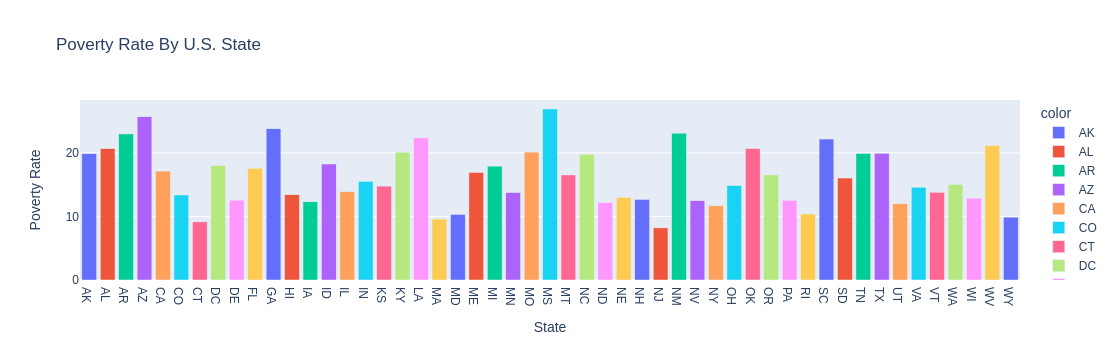

In [23]:
vbar = px.bar(
    x = state_pvt_group.State,
    y = state_pvt_group.poverty_rate,
    color = state_pvt_group.State,
    color_continuous_scale='Aggrnyl',
    title = 'Poverty Rate By U.S. State')

vbar.update_layout(xaxis_title='State',
                   coloraxis_showscale=False,
                   yaxis_title='Poverty Rate')
vbar.show()


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [24]:
df_pct_completed_hs.rename(columns={'Geographic Area': 'State'}, inplace=True)

In [25]:
df_pct_completed_hs = df_pct_completed_hs.drop(df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] == '-'].index)

In [26]:
df_pct_completed_hs.shape

(29132, 3)

In [27]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype('float')

In [28]:
hsGrad_state_group = df_pct_completed_hs.groupby('State', as_index=False).mean()

/tmp/ipykernel_22969/2204736015.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [29]:
# hsGrad_state_group.sort_values(by='percent_completed_hs', inplace=True)

In [30]:
hsGrad_state_group.head()

State  percent_completed_hs
0    AK                 84.63
1    AL                 80.30
2    AR                 79.95
3    AZ                 80.47
4    CA                 81.96

In [31]:
df_pct_completed_hs.head()

State             City  percent_completed_hs
0    AL       Abanda CDP                 21.20
1    AL   Abbeville city                 69.10
2    AL  Adamsville city                 78.90
3    AL     Addison town                 81.40
4    AL       Akron town                 68.60

In [32]:
hsFail_state_group = hsGrad_state_group.copy()

In [33]:
hsFail_state_group.rename(columns={'percent_completed_hs': 'percent_not_graduating_hs'}, inplace=True)

In [34]:
start_rates = hsFail_state_group['percent_not_graduating_hs']

In [35]:
fail_rates = [100 - x for x in start_rates]

In [36]:
# fail_rates_lh = fail_rates.sort()

In [37]:
fail_rates

[15.372619047619054,
 19.69931506849315,
 20.050462107208872,
 19.532882882882873,
 18.044570286475675,
 9.893362831858411,
 8.408333333333331,
 10.700000000000003,
 11.480519480519476,
 14.262185792349726,
 20.987499999999997,
 8.33443708609272,
 9.887736789631106,
 14.832000000000008,
 11.516556776556783,
 13.680735294117653,
 11.769552238805971,
 17.629870129870127,
 20.710359408033824,
 7.59591836734694,
 11.577519379844958,
 8.56923076923077,
 10.792341040462432,
 10.534440753045416,
 16.477734374999997,
 21.529281767955794,
 9.511570247933875,
 16.75054200542006,
 12.184750000000008,
 10.012131715771233,
 9.288659793814432,
 9.14604051565378,
 19.017361111111114,
 12.284615384615378,
 9.386276150627623,
 11.655399835119539,
 17.090257104194848,
 11.695454545454538,
 10.976604202157858,
 11.175000000000011,
 19.150126582278475,
 12.24609375,
 18.368837209302328,
 24.310000000000002,
 8.382075471698116,
 15.119730185497474,
 10.023140495867764,
 11.802423263327938,
 9.7360360360360

In [38]:
hsFail_state_group['percent_not_graduating_hs'] = fail_rates

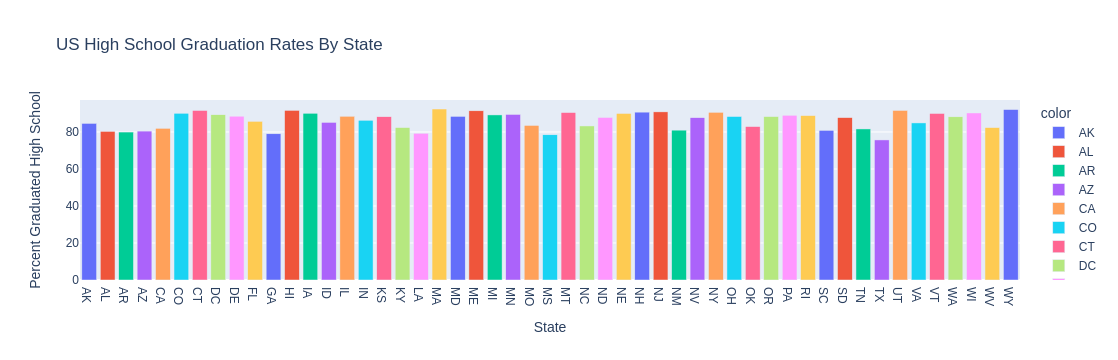

In [39]:
vbar = px.bar(
    x = hsGrad_state_group.State,
    y = hsGrad_state_group.percent_completed_hs,
    color = state_pvt_group.State,
    color_continuous_scale='Aggrnyl',
    title = 'US High School Graduation Rates By State')

vbar.update_layout(xaxis_title='State',
                   coloraxis_showscale=False,
                   yaxis_title='Percent Graduated High School')
vbar.show()


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [40]:
hsFail_state_group0 = hsFail_state_group.set_index('State')
hsFail_state_group1 = hsFail_state_group0.reindex(index=state_pvt_ascend['State'])
hsFail_state_group2 = hsFail_state_group1.reset_index()

In [41]:
hsGrad_state_group0 = hsGrad_state_group.set_index('State')
hsGrad_state_group1 = hsGrad_state_group0.reindex(index=state_pvt_ascend['State'])
hsGrad_state_group2 = hsGrad_state_group1.reset_index()

In [42]:
hsGrad_state_group2.shape

(51, 2)

In [43]:
hsFail_state_group2['percent_not_graduating_hs'].shape

(51,)

Text(0, 0.5, 'HS Graduation Rate')

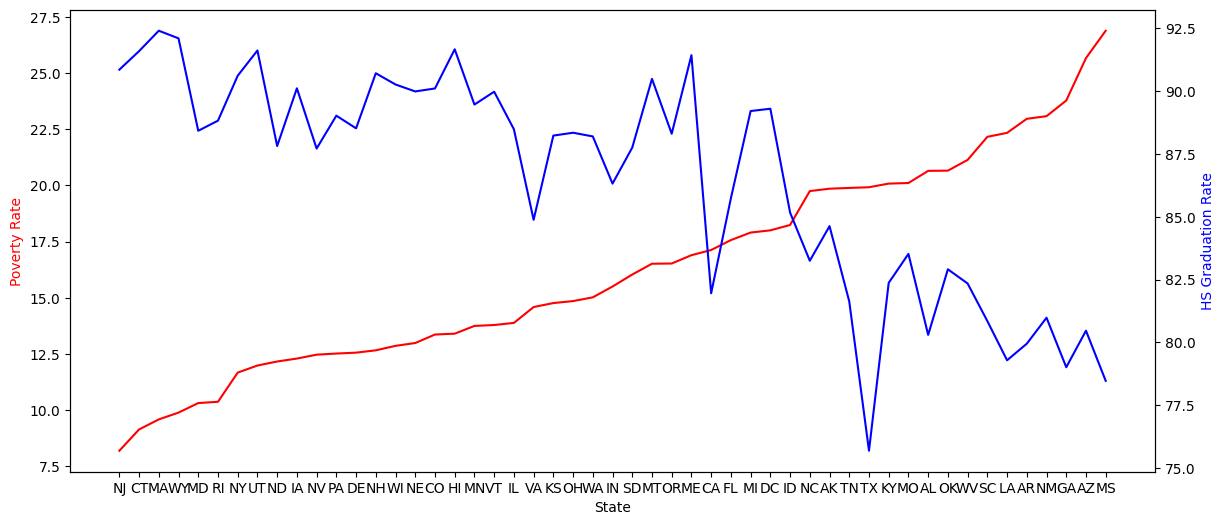

In [44]:
plt.figure(figsize=(14,6))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(state_pvt_ascend.State, state_pvt_ascend.poverty_rate, color='r')
ax2.plot(hsGrad_state_group2.State, hsGrad_state_group2.percent_completed_hs, color='b')

ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color='red')
ax2.set_ylabel('HS Graduation Rate', color='blue')

In [45]:
hsFail_and_pvt = state_pvt_ascend.copy()

In [46]:
state_grad_fail = hsFail_state_group2.percent_not_graduating_hs.values

In [47]:
fail_rates = pd.Series(state_grad_fail)

In [48]:
hsFail_and_pvt['percent_not_graduating_hs'] = fail_rates.values

In [49]:
hsFail_and_pvt.tail(10)

State  poverty_rate  percent_not_graduating_hs
1     AL         20.65                      19.70
36    OK         20.66                      17.09
49    WV         21.13                      17.65
40    SC         22.16                      19.15
18    LA         22.34                      20.71
2     AR         22.96                      20.05
32    NM         23.08                      19.02
10    GA         23.78                      20.99
3     AZ         25.67                      19.53
25    MS         26.88                      21.53

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

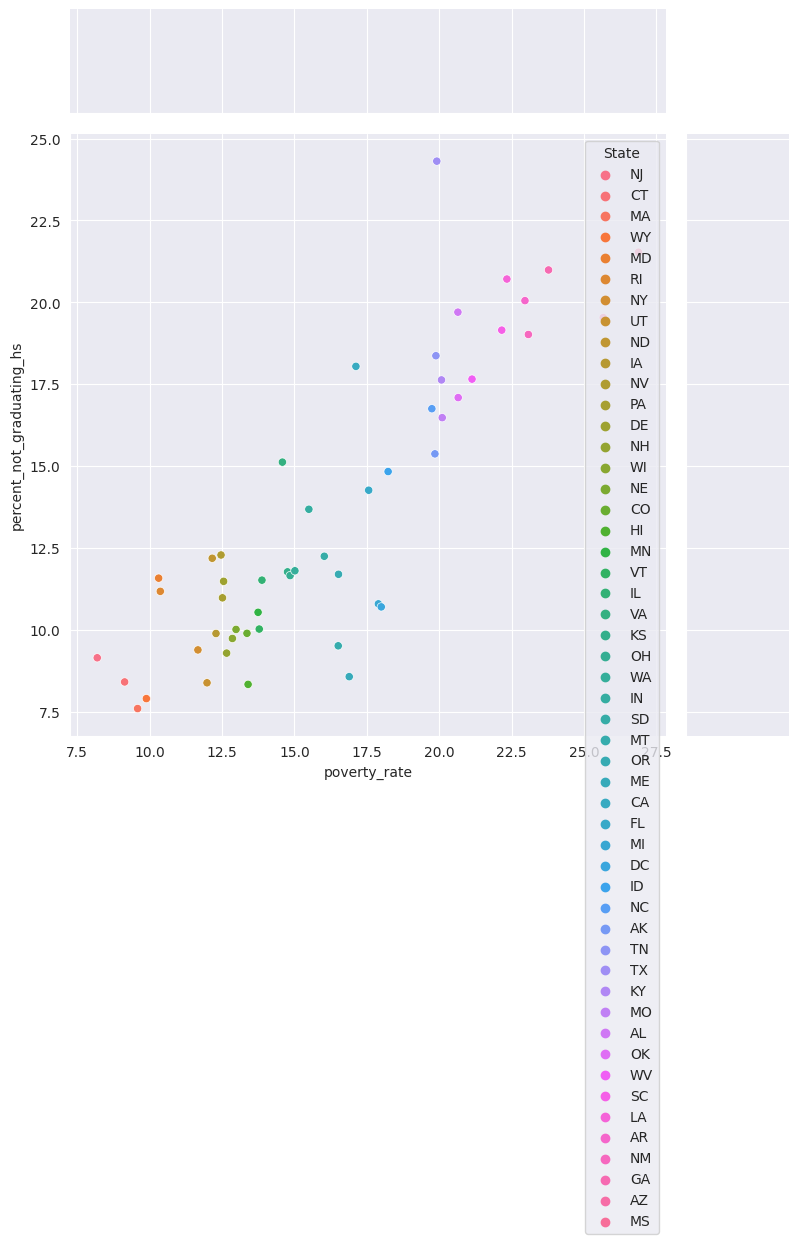

In [50]:
sns.set_style('darkgrid')
sns.jointplot(x=hsFail_and_pvt.poverty_rate, y=hsFail_and_pvt.percent_not_graduating_hs, kind="scatter", hue=hsFail_and_pvt.State, height=8, ratio=5, marginal_ticks=False)


In [51]:
pov_rates = state_pvt_ascend.poverty_rate.values

In [52]:
hsGrad_state_group2['poverty_rate'] = pd.Series(pov_rates)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [53]:
hsGrad_state_group2.head(1)

State  percent_completed_hs  poverty_rate
0    NJ                 90.85          8.19

/home/ken/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



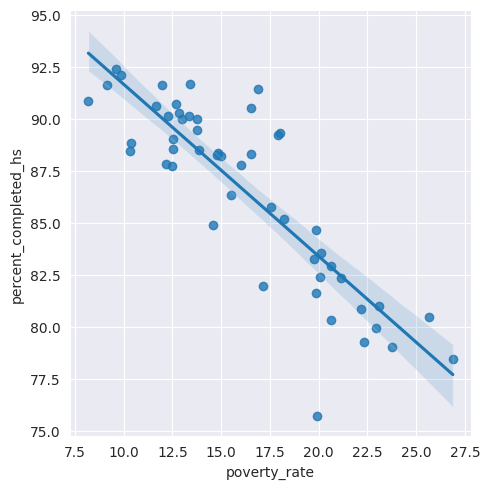

In [54]:
sns.lmplot(data=hsGrad_state_group2,x='poverty_rate', y='percent_completed_hs')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [55]:
cols = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [56]:
race_state_group = df_share_race_city.groupby(by='Geographic area', as_index=False).mean()

/tmp/ipykernel_22969/199977743.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [57]:
race_state_group.rename(columns={'Geographic area': 'State'}, inplace=True)

In [180]:
race_state_group

State  share_white  share_black  share_native_american  share_asian  \
0     AK        45.65         0.57                  45.86         1.39   
1     AL        72.51        23.32                   0.66         0.48   
2     AR        78.45        16.30                   0.76         0.48   
3     AZ        59.93         0.95                  28.59         0.73   
4     CA        71.87         2.69                   1.72         5.57   
5     CO        87.77         0.92                   1.62         1.15   
6     CT        86.11         4.99                   0.66         2.99   
7     DC        38.50        50.70                   0.30         3.50   
8     DE        76.25        15.39                   0.52         2.00   
9     FL        78.67        13.37                   0.46         1.62   
10    GA        62.59        30.63                   0.30         1.49   
11    HI        33.37         1.07                   0.39        25.65   
12    IA        96.71         0.56                   0.27         0.40   
13    ID        88.82         0.30                   2.52         0.49   
14    IL        90.36         4.70                   0.26         1.34   
15    IN        94.82         1.69                   0.28         0.59   
16    KS        92.96         0.96                   1.87         0.43   
17    KY        92.23         4.42                   0.21         0.71   
18    LA        64.81        30.78                   0.96         0.79   
19    MA        89.67         2.80                   0.27         2.85   
20    MD        72.12        19.46                   0.34         2.98   
21    ME        95.69         0.82                   0.55         1.03   
22    MI        90.67         4.12                   1.08         0.95   
23    MN        91.80         1.00                   3.36         1.03   
24    MO        90.44         5.88                   0.54         0.55   
25    MS        53.80        41.83                   1.61         0.55   
26    MT        84.48         0.23                  11.87         0.32   
27    NC        71.52        20.40                   1.79         0.93   
28    ND        92.29         0.36                   5.33         0.29   
29    NE        94.72         0.42                   1.56         0.29   
30    NH        95.68         0.72                   0.29         1.34   
31    NJ        80.89         6.98                   0.26         5.94   
32    NM        65.42         0.67                  15.34         0.49   
33    NV        82.33         1.57                   5.58         2.01   
34    NY        88.88         4.01                   0.36         2.72   
35    OH        92.80         3.96                   0.22         0.75   
36    OK        72.93         3.38                  14.38         0.43   
37    OR        87.63         0.53                   2.59         1.38   
38    PA        93.25         3.27                   0.16         0.99   
39    RI        89.23         2.99                   0.67         1.69   
40    SC        61.98        32.83                   0.46         0.74   
41    SD        84.82         0.29                  12.03         0.32   
42    TN        88.95         7.30                   0.32         0.64   
43    TX        82.59         5.88                   0.66         1.01   
44    UT        89.44         0.38                   3.87         0.77   
45    VA        74.60        16.51                   0.34         3.67   
46    VT        95.87         0.77                   0.37         0.91   
47    WA        82.38         1.43                   3.75         3.07   
48    WI        92.96         0.94                   2.62         0.79   
49    WV        95.04         2.92                   0.20         0.34   
50    WY        92.37         0.40                   3.10         0.39   

    share_hispanic  
0             2.15  
1             2.98  
2             4.27  
3            20.14  
4            29.65  
5            17.90  
6      

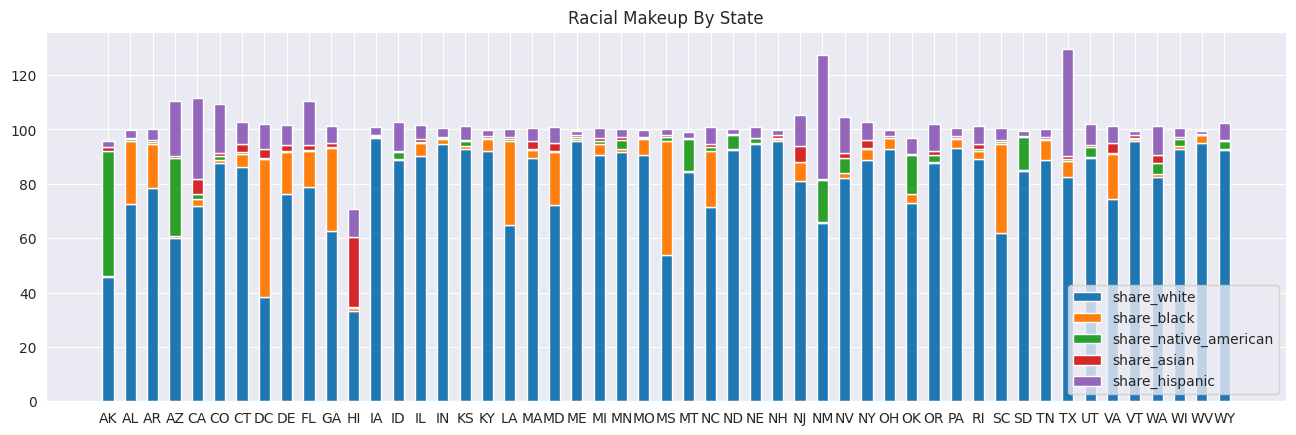

In [59]:
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(51)
fig.set_figwidth(16)

for header, vals in race_state_group.items():
    if header == 'State':
        continue
    p = ax.bar(race_state_group.State, vals, width, label=header, bottom=bottom)
    bottom += vals

ax.set_title("Racial Makeup By State")
ax.legend(loc="best")
plt.show()

# Create Donut Chart of People Killed by Race

Hint: Use `.value_counts()`

In [60]:
fatalities_clean = df_fatalities.dropna()
# races: A, B, H, W, N, O

In [61]:
killed_by_race = fatalities_clean.groupby(by='race', as_index=False).count()

In [62]:
killed_by_race = killed_by_race[['race', 'id']]

In [63]:
killed_by_race.rename(columns={'id': 'fatalities'}, inplace=True)

In [64]:
killed_by_race['race'] = pd.Series(['Asian', 'Black', 'Hispanic', 'Indian', 'Other', 'White'])

In [65]:
killed_by_race

race  fatalities
0     Asian          36
1     Black         592
2  Hispanic         401
3    Indian          29
4     Other          28
5     White        1168

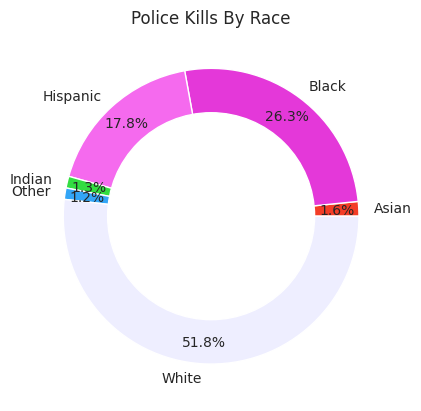

In [66]:

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

colors = ['#f33d27', '#e438d9', '#f56aee', '#33dd41', '#33a5f6', '#eeeeff']

plt.pie(killed_by_race.fatalities, colors=colors, labels=killed_by_race.race,

        autopct='%1.1f%%', pctdistance=0.85,)

        # explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title('Police Kills By Race')

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [67]:
men_vs_women = fatalities_clean[['gender', 'id']]

In [68]:
men_vs_women = men_vs_women.groupby(by='gender', as_index=False).count()

In [69]:
men_vs_women.rename(columns={'id': 'fatalities', 'F': 'females', 'M': 'males'}, inplace=True)

In [70]:
fatalities_clean.head(1)

id        name      date manner_of_death armed   age gender race     city  \
0   3  Tim Elliot  02/01/15            shot   gun 53.00      M    A  Shelton   

  state  signs_of_mental_illness threat_level         flee  body_camera  
0    WA                     True       attack  Not fleeing        False

([<matplotlib.patches.Wedge at 0x7dcd382e4370>,
 [Text(-1.090572662096721, 0.1437054928917867, 'Males'),
  Text(1.0905726604148862, -0.14370550565513393, 'Females')],
 [Text(-0.5948578156891206, 0.0783848143046109, '95.8%'),
  Text(0.594857814771756, -0.07838482126643667, '4.2%')])

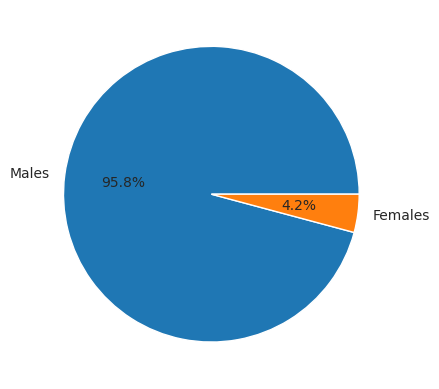

In [71]:
labels = 'Males', 'Females'
sizes = [2160, 94]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')



# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

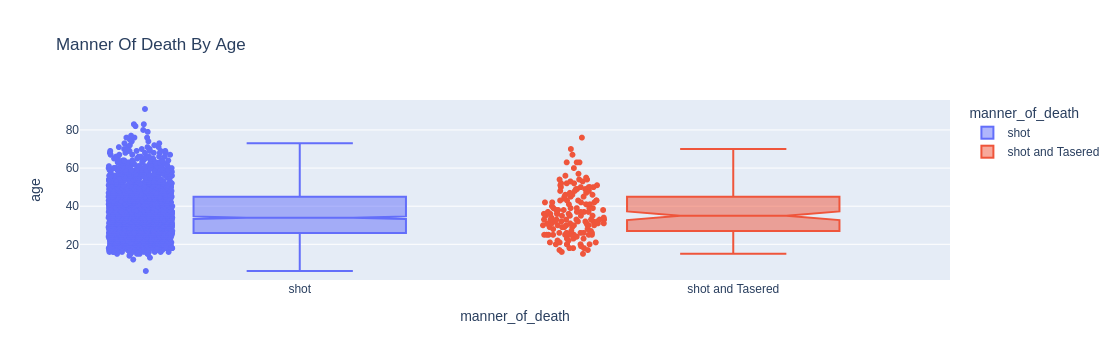

In [72]:
    box = px.box(fatalities_clean,
                 y='age',
                 x='manner_of_death',
                 color='manner_of_death',
                 notched=True,
                 points='all',
                 title='Manner Of Death By Age')     
    box.show()

<Axes: xlabel='manner_of_death', ylabel='age'>

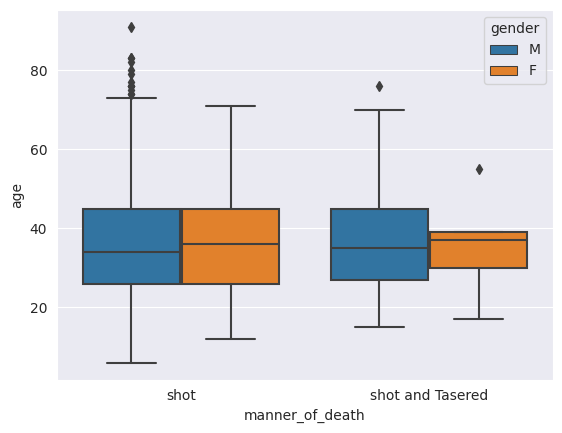

In [73]:


sns.boxplot(x = fatalities_clean.manner_of_death,

            y = fatalities_clean.age,

            hue = fatalities_clean.gender)


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that shows what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [74]:
print(f"In 165 cases the fatality was not armed, out of a set of 2,254, or {(165/2254)*100}%.")

In 165 cases the fatality was not armed, out of a set of 2,254, or 7.320319432120674%.


In [75]:
armed_with = fatalities_clean.groupby(by='armed', as_index=False).count()

In [76]:
armed_with.sort_values(by='id', inplace=True)

In [77]:
armed_df = armed_with[['armed', 'age']]

In [78]:
armed_df.rename(columns={'age': 'occurrences'}, inplace=True)

/tmp/ipykernel_22969/3920276668.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
armed_df

armed  occurrences
33  lawn mower blade            1
21          flagpole            1
22        flashlight            1
23       garden tool            1
24       glass shard            1
..               ...          ...
62        toy weapon          102
66           vehicle          158
63           unarmed          165
32             knife          324
25               gun         1247

[67 rows x 2 columns]

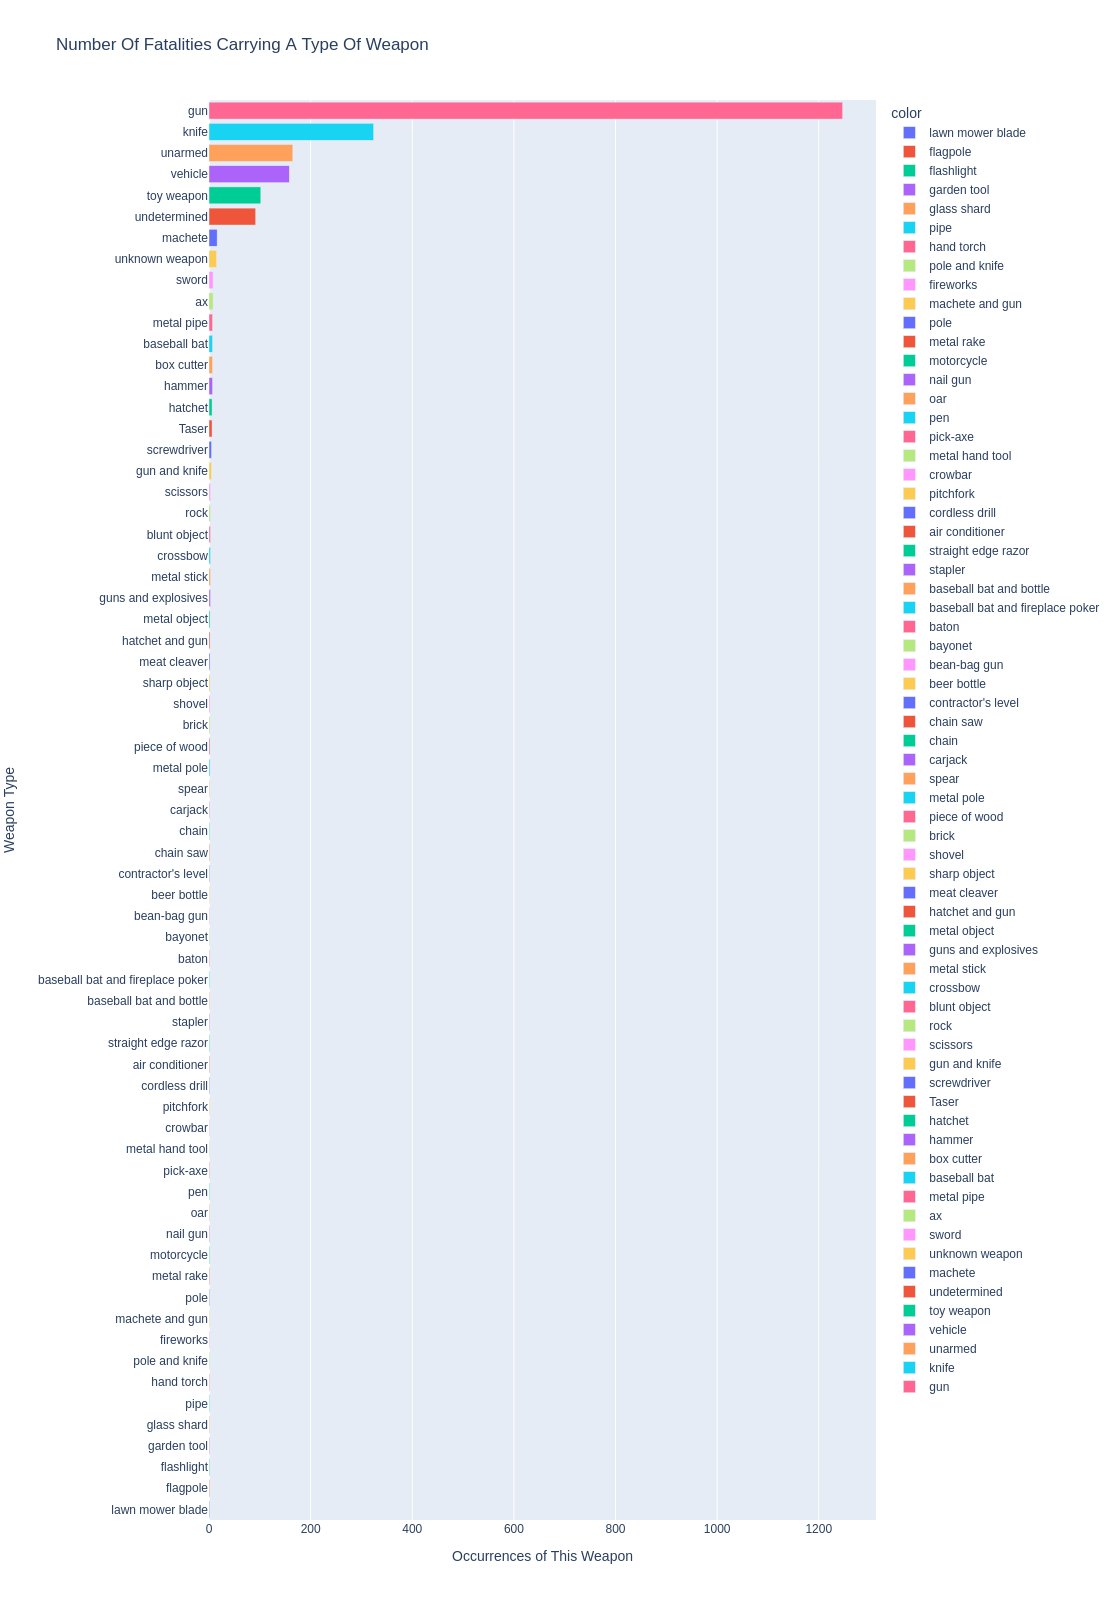

In [80]:
    h_bar = px.bar(x=armed_df.occurrences,
                   y=armed_df.armed,
                   orientation='h',
                   color=armed_df.armed,
                   color_continuous_scale='Viridis',
                   title='Number Of Fatalities Carrying A Type Of Weapon')
     
    h_bar.update_layout(xaxis_title='Occurrences of This Weapon', 
                        yaxis_title='Weapon Type',
                        coloraxis_showscale=False,
                        height=1600,
                        width=1200)
    h_bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [81]:
fatality_age = fatalities_clean[(fatalities_clean['age'] < 25)]

In [82]:
print(f"The percentage of fatilities that were less than 25 was {fatality_age.shape[0] / fatalities_clean.shape[0] * 100}%")

The percentage of fatilities that were less than 25 was 18.722271517302573%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

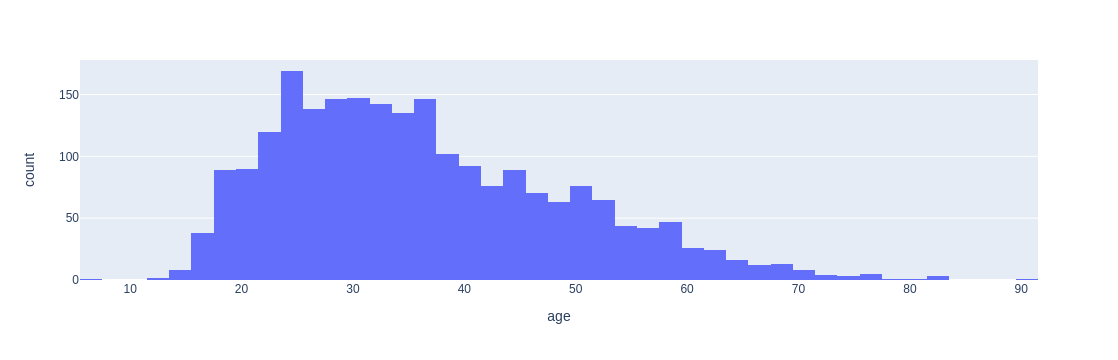

In [83]:
fig = px.histogram(fatalities_clean, x="age")
fig.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [84]:
fatalities_clean.head(1)

id        name      date manner_of_death armed   age gender race     city  \
0   3  Tim Elliot  02/01/15            shot   gun 53.00      M    A  Shelton   

  state  signs_of_mental_illness threat_level         flee  body_camera  
0    WA                     True       attack  Not fleeing        False

In [85]:
asian_fatal = fatalities_clean[(fatalities_clean['race'] == 'A')]

<Axes: xlabel='age', ylabel='Density'>

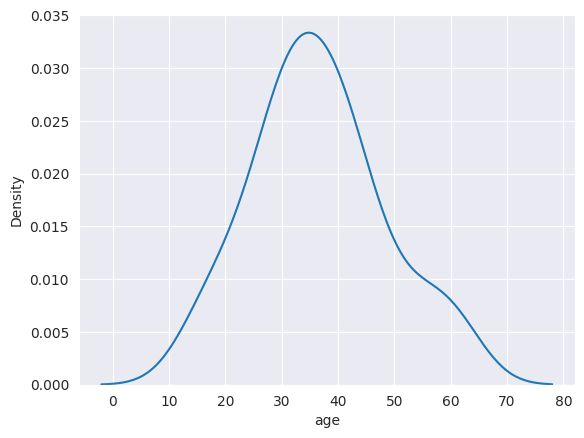

In [86]:
sns.kdeplot(data=asian_fatal, x="age")

In [87]:
black_fatal = fatalities_clean[(fatalities_clean['race'] == 'B')]

<Axes: xlabel='age', ylabel='Density'>

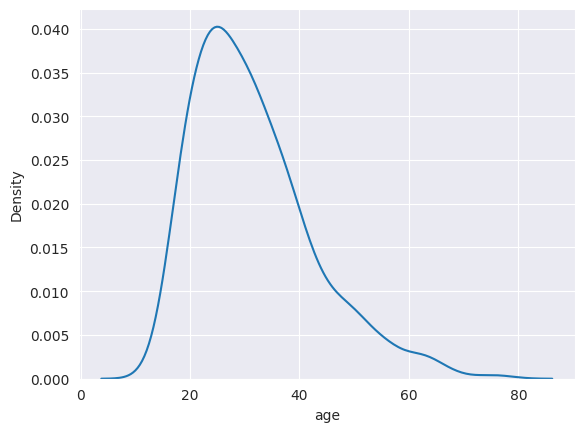

In [88]:
sns.kdeplot(data=black_fatal, x='age')

In [89]:
hispanic_fatal = fatalities_clean[(fatalities_clean['race'] == 'H')]

<Axes: xlabel='age', ylabel='Density'>

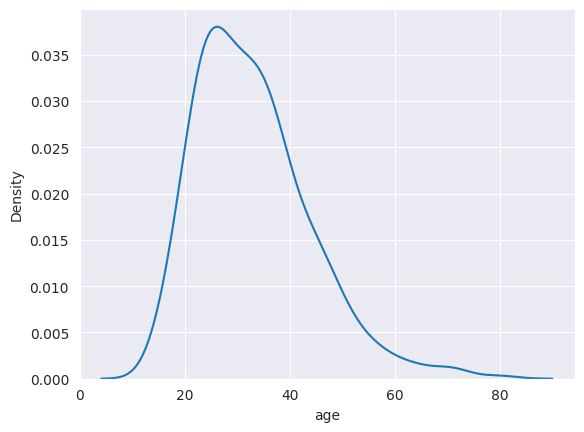

In [90]:
sns.kdeplot(data=hispanic_fatal, x='age')

In [91]:
indian_fatal = fatalities_clean[(fatalities_clean['race'] == 'N')]

<Axes: xlabel='age', ylabel='Density'>

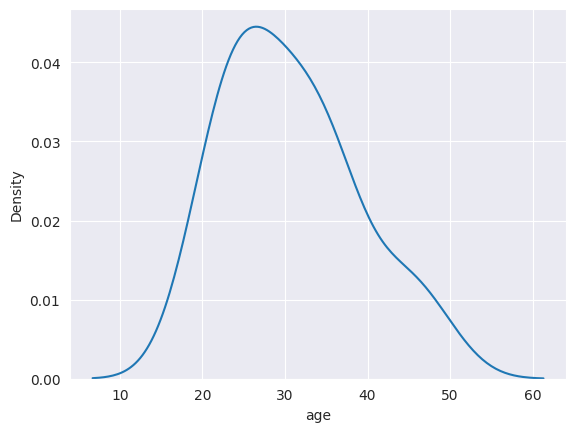

In [92]:
sns.kdeplot(data=indian_fatal, x='age')

In [93]:
other_fatal = fatalities_clean[(fatalities_clean['race'] == 'O')]

<Axes: xlabel='age', ylabel='Density'>

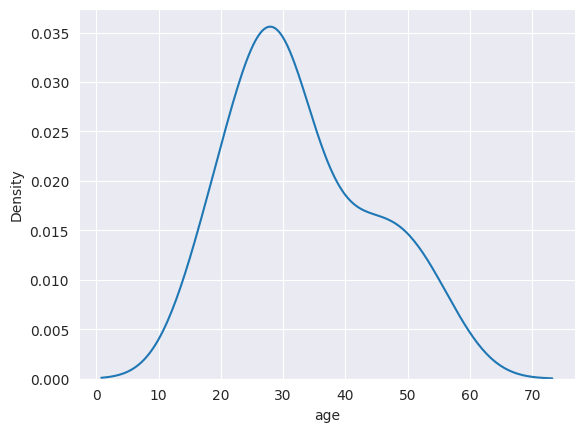

In [94]:
sns.kdeplot(data=other_fatal, x='age')

In [95]:
white_fatal = fatalities_clean[(fatalities_clean['race'] == 'W')]

<Axes: xlabel='age', ylabel='Density'>

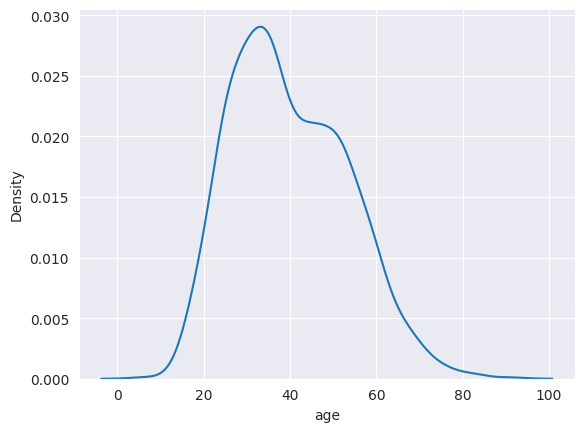

In [96]:
sns.kdeplot(data=white_fatal, x='age')

In [97]:
print("The kde plots show that 28-32 is the most common age across all races among total fatalities.")

The kde plots show that 28-32 is the most common age across all races among total fatalities.


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [98]:
fc = fatalities_clean

In [99]:
fc[(fc.race == 'A')].groupby(by='race', as_index=False).count()['id'].values[0]

36

<BarContainer object of 6 artists>

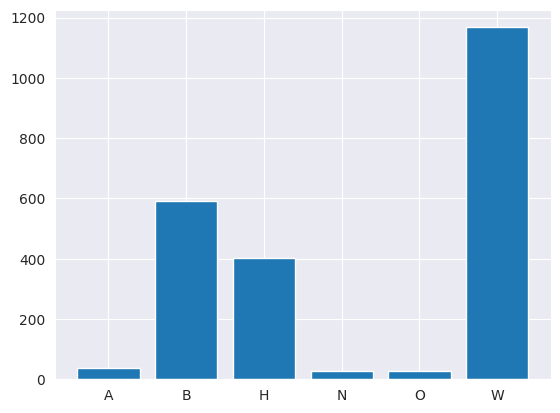

In [100]:
plt.bar(['A', 'B', 'H', 'N', 'O', 'W'], [fc[(fc.race == 'A')].groupby(by='race', as_index=False).count()['id'].values[0], 
        fc[(fc.race == 'B')].groupby(by='race', as_index=False).count()['id'].values[0],
        fc[(fc.race == 'H')].groupby(by='race', as_index=False).count()['id'].values[0],
        fc[(fc.race == 'N')].groupby(by='race', as_index=False).count()['id'].values[0], 
        fc[(fc.race == 'O')].groupby(by='race', as_index=False).count()['id'].values[0],
        fc[(fc.race == 'W')].groupby(by='race', as_index=False).count()['id'].values[0]])

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [101]:
fc.head(1)

id        name      date manner_of_death armed   age gender race     city  \
0   3  Tim Elliot  02/01/15            shot   gun 53.00      M    A  Shelton   

  state  signs_of_mental_illness threat_level         flee  body_camera  
0    WA                     True       attack  Not fleeing        False

In [102]:
print(f"Looks like it's about {fc[(fc.signs_of_mental_illness == True)].shape[0] / fc.shape[0] * 100}%.")

Looks like it's about 25.42147293700089%.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [103]:
by_city = fc.groupby(by='city', as_index=False).count()

In [104]:
by_city_sorted = by_city.sort_values(by='id', ascending=False)

In [105]:
by_city_indexed = by_city_sorted.reset_index()

In [106]:
fatalities_by_city_10 = by_city_indexed.loc[0:9]

In [107]:
by_city_sorted

city  id  name  date  manner_of_death  armed  age  gender  \
658       Los Angeles  35    35    35               35     35   35      35   
895           Phoenix  28    28    28               28     28   28      28   
518           Houston  24    24    24               24     24   24      24   
212           Chicago  22    22    22               22     22   22      22   
57             Austin  18    18    18               18     18   18      18   
..                ...  ..   ...   ...              ...    ...  ...     ...   
506  Holland Township   1     1     1                1      1    1       1   
507   Hollywood Hills   1     1     1                1      1    1       1   
508          Homedale   1     1     1                1      1    1       1   
509             Homer   1     1     1                1      1    1       1   
641     Little Havana   1     1     1                1      1    1       1   

     race  state  signs_of_mental_illness  threat_level  flee  body_camera  
658    35     35                       35            35    35           35  
895    28     28                       28            28    28           28  
518    24     24                       24            24    24           24  
212    22     22                       22            22    22           22  
57     18     18                       18            18    18           18  
..    ...    ...                      ...           ...   ...          ...  
506     1      1                        1             1     1            1  
507     1      1                        1             1     1            1  
508     1      1                        1             1     1            1  
509     1      1                        1             1     1            1  
641     1      1                        1             1     1            1  

[1282 rows x 14 columns]

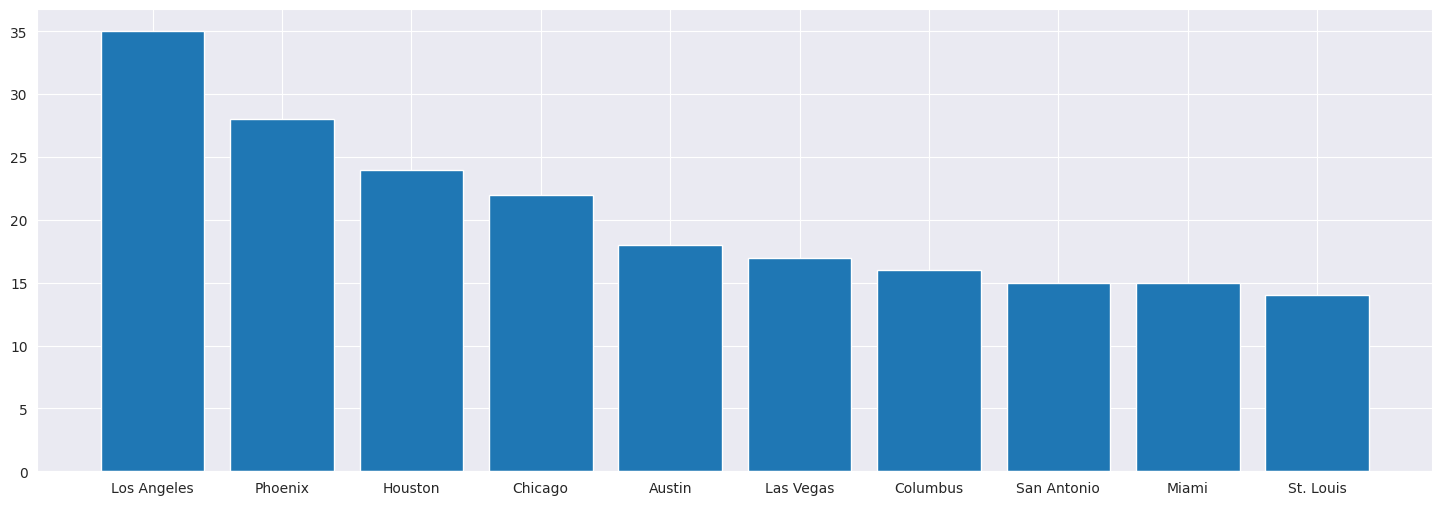

In [108]:
plt.figure(figsize=(18, 6))
plt.bar(x=fatalities_by_city_10.city, height=fatalities_by_city_10.id)
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [181]:
rod_by_race = {}
# for row in fatalities_by_city_10.iterrows():
for race in ['A', 'B', 'H', 'N', 'O', 'W']:
    # print(f"{row[1].city} total is {city_total}")
    for row in fatalities_by_city_10.iterrows():
        city_total = fatalities_by_city_10[(fatalities_by_city_10['city'] == row[1].city)].id.values[0]
        result = fc[(fc['city'] == row[1].city) & (fc['race'] == race)]
        race_percentage = int(round(result.shape[0] / city_total, 2) * 100)
        try:
            rod_by_race[race].append(race_percentage)
        except KeyError:
            rod_by_race[race] = [race_percentage]


In [182]:
rod_by_race

{'A': [3, 0, 4, 0, 0, 0, 0, 0, 0, 0],
 'B': [28, 7, 57, 86, 17, 18, 56, 13, 47, 79],
 'H': [51, 39, 21, 5, 11, 28, 0, 73, 40, 0],
 'N': [0, 11, 4, 0, 0, 0, 0, 0, 0, 0],
 'O': [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
 'W': [17, 43, 12, 9, 72, 53, 38, 13, 13, 21]}

In [183]:
rod_by_race['city'] = fatalities_by_city_10.city

In [184]:
rod_by_race_df = pd.DataFrame(rod_by_race)

In [185]:
rod_by_race_df

A   B   H   N  O   W         city
0  3  28  51   0  0  17  Los Angeles
1  0   7  39  11  0  43      Phoenix
2  4  57  21   4  0  12      Houston
3  0  86   5   0  0   9      Chicago
4  0  17  11   0  0  72       Austin
5  0  18  28   0  0  53    Las Vegas
6  0  56   0   0  6  38     Columbus
7  0  13  73   0  0  13  San Antonio
8  0  47  40   0  0  13        Miami
9  0  79   0   0  0  21    St. Louis

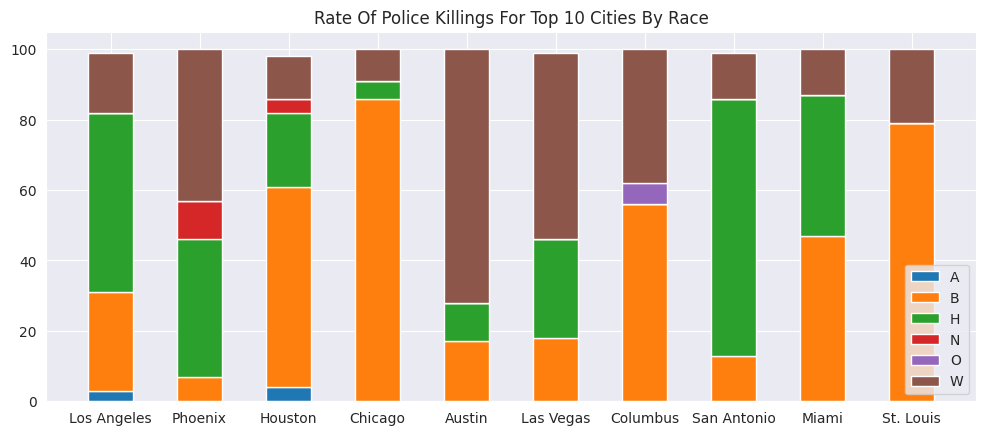

In [187]:
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(10)
fig.set_figwidth(12)

for header, vals in rod_by_race.items():
    if header == 'city':
        continue
    p = ax.bar(rod_by_race_df.city, vals, width, label=header, bottom=bottom)
    bottom += vals

ax.set_title("Rate Of Police Killings For Top 10 Cities By Race")
ax.legend(loc="best")
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [198]:
state_df = fc.groupby(by='state', as_index=False).count()

In [204]:
state_df.sort_values(by='id', inplace=True)

In [193]:
states = states.state.values

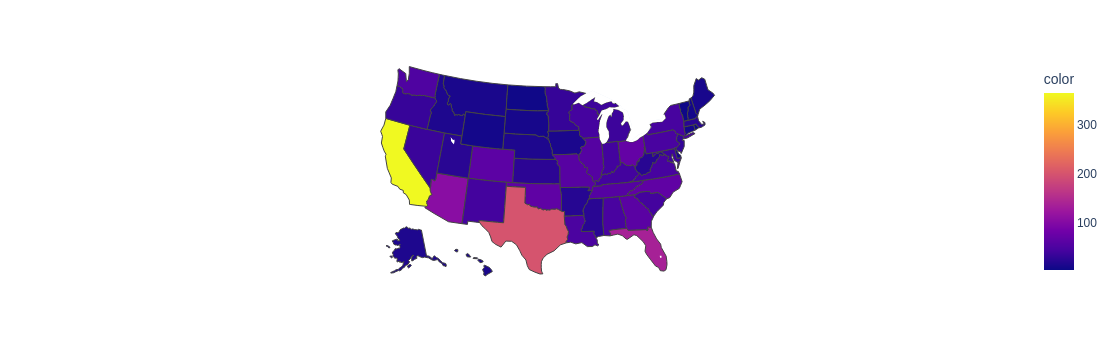

In [202]:
import plotly.express as px

fig = px.choropleth(locations=states, locationmode="USA-states", color=state_df.id, scope="usa")
fig.show()

In [207]:
print(f"Although this dataset does not provide state population numbers, a quick Google search confirms that the three most populous states are \nthe three with the most police killings, as shown in the diagram above.")

Although this dataset does not provide state population numbers, a quick Google search confirms that the three most populous states are 
the three with the most police killings, as shown in the diagram above.


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [210]:
fc['date'] = pd.to_datetime(fc.date)

/tmp/ipykernel_22969/3340807154.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [233]:
by_year = fc.groupby(fc['date'].dt.year).count()

id  name  date  manner_of_death  armed  age  gender  race  city  state  \
date                                                                            
2015  947   947   947              947    947  947     947   947   947    947   
2016  873   873   873              873    873  873     873   873   873    873   
2017  434   434   434              434    434  434     434   434   434    434   

      signs_of_mental_illness  threat_level  flee  body_camera  
date                                                            
2015                      947           947   947          947  
2016                      873           873   873          873  
2017                      434           434   434          434

In [235]:
by_year.rename(columns={'id': 'fatalities'}, inplace=True)

In [236]:
fatalities_by_year = by_year[['date', 'fatalities']]

In [238]:
fatalities_by_year = fatalities_by_year.drop('date', 1)

/tmp/ipykernel_22969/275526141.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [241]:
print(f"Surprisingly, the trend over the years 2015-2017 is towards fewer police killings. In fact, nationwide, in 2017 there were\nless than half the number of recorded killings in 2015. I suspect this is due to greater focus on police conduct.")

Surprisingly, the trend over the years 2015-2017 is towards fewer police killings. In fact, nationwide, in 2017 there were
less than half the number of recorded killings in 2015. I suspect this is due to greater focus on police conduct.


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).